####  1 -  Turboaz datasını scrape edin

#### 2 - Ən yüksək nəticə verən modeli qurun

#### 3 - Maşının bazar dəyərini proqnoz edən  funksiya yazın ( inputlar - make, model, engine, year )

In [1]:
from selenium import webdriver
import pandas as pd
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re 
from matplotlib import pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
# %matplotlib inline
print("Setup Complete")

Setup Complete


## another method from github

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from csv import writer
from time import sleep

driver = webdriver.Chrome('/Users/nijatjafarov/Downloads/chromedriver')

driver.get('https://turbo.az/autos?utf8=%E2%9C%93&q%5Bsort%5D=&q%5Bmake%5D%5B%5D=&q%5Bmake%5D%5B%5D=23&q%5Bmodel%5D%5B%5D=&q%5Bmodel%5D%5B%5D=946')

with open('turbo.csv', 'w') as turbo_csv:
    csv_writer = writer(turbo_csv)
    csv_writer.writerow(['Price', 'Year', 'Engine', 'Distance'])
    while True:
        cars = driver.find_elements(By.CLASS_NAME, 'products-i__bottom')
        for car in cars:
            price = car.find_element(By.CLASS_NAME, 'product-price').text
            year, engine, distance = car.find_element(By.CLASS_NAME, 'products-i__attributes').text.split(', ')
            
            csv_writer.writerow([price, year, engine, distance])
        try:
            next_button = driver.find_element(By.LINK_TEXT, 'Növbəti')
            next_button.click()
            sleep(5)
        except NoSuchElementException:
            driver.quit()
#driver.quit()

## main method for me

In [65]:
turboaz = pd.DataFrame()

In [68]:
%%time

for page_num in range(1,4000):
    url = f'https://turbo.az/autos?page={page_num}'
    
    page = requests.get(url)

    html = BeautifulSoup(page.content, 'html.parser')

    html_result = html.find_all('div', class_ = 'products-i__bottom')

    # sub - substitute
    for i in range(len(html_result)):   
        car_info = re.sub('<[^>]+>' , ' ', str(html_result[i]))
        price = int(car_info.strip().split('  ')[0].replace(' ',''))
        currency = car_info.strip().split('  ')[1]
        make_model = car_info.strip().split('  ')[3]
        year = int(car_info.strip().split('  ')[4].split(',')[0])
        engine = car_info.strip().split('  ')[4].split(',')[1].strip()
        km = car_info.strip().split('  ')[4].split(',')[2].strip()
        city = car_info.strip().split('  ')[5].split(',')[0]
        date = car_info.strip().split('  ')[5].split(',')[1].strip()


        turboaz = turboaz.append({
            'Price':price,
            'Currency':currency,
            'Make_and_Model':make_model,
            'Production_Year':year,
            'Engine_Power':engine,
            'KM_Driven':km,
            'City':city,
            'Date':date
        }, ignore_index=True)

Wall time: 47min 22s


In [69]:
turboaz

,Price,Currency,Make_and_Model,Production_Year,Engine_Power,KM_Driven,City,Date
0,77000.0,$,Maserati Levante,2018.0,3.0 L,35 000 km,Bakı,12.09.2022 16:34
1,37900.0,AZN,Changan CS 35,2022.0,1.4 L,0 km,Bakı,17.09.2022 15:06
2,34300.0,AZN,Hyundai Santa Fe,2016.0,2.0 L,35 000 km,Bakı,dünən 17:49
3,30542.0,AZN,Toyota Prado,2008.0,2.7 L,157 000 km,Bakı,dünən 23:01
4,11500.0,AZN,Volkswagen Passat,2005.0,2.0 L,423 000 km,Lənkəran,17.09.2022 16:30
...,...,...,...,...,...,...,...,...
15043,25600.0,AZN,Chery Tiggo 2,2020.0,1.5 L,10 350 km,Bakı,15.09.2022 19:39
15044,8400.0,AZN,Subaru Forester,2007.0,2.0 L,270 000 km,Bakı,15.09.2022 19:56
15045,6900.0,AZN,LADA (VAZ) Kalina,2005.0,1.6 L,267 000 km,Bakı,15.09.2022 19:37
15046,17500.0,AZN,Kia Sportage,2008.0,2.0 L,251 568 km,Sumqayıt,15.09.2022 19:36


In [8]:
#turboaz=pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\kurslar\lesson_course\data\turbo.xlsx')

In [6]:
turboaz['Currency'].unique()

array(['USD', 'AZN', 'EUR', '$', '€'], dtype=object)

In [10]:
turboaz['Currency'] = turboaz['Currency'].replace('$','USD').replace('€','EUR')
turboaz

,Unnamed: 0,Price,Currency,Make_and_Model,Production_Year,Engine_Power,KM_Driven,City,Date,Date1,Time,Date2,Engine,km
0,0,1007165.0,USD,Mercedes GLS 580,2022,4.0 L,0 km,Bakı,25.08.2022 11:26,25.08.2022,11:26,25.08.2022,4.0,0
1,1,410235.5,USD,Mercedes E 300,2022,2.0 L,0 km,Bakı,25.08.2022 11:27,25.08.2022,11:27,25.08.2022,2.0,0
2,2,37200.0,AZN,KAIYI X3 Pro,2022,1.5 L,0 km,Bakı,08.08.2022 14:01,08.08.2022,14:01,08.08.2022,1.5,0
3,3,200941.7,USD,Subaru Forester,2022,2.5 L,0 km,Bakı,26.08.2022 09:15,26.08.2022,09:15,26.08.2022,2.5,0
4,4,14400.0,AZN,Nissan Tiida,2012,1.5 L,39 000 km,Bakı,27.08.2022 10:22,27.08.2022,10:22,27.08.2022,1.5,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,25512,89590.0,USD,Jeep Grand Cherokee,2014,3.6 L,102 000 km,Bakı,27.08.2022 19:01,27.08.2022,19:01,27.08.2022,3.6,102
17494,25515,184960.0,USD,Lexus RX 300,2020,2.0 L,39 000 km,Bakı,27.08.2022 19:56,27.08.2022,19:56,27.08.2022,2.0,39
17495,25517,69360.0,USD,BMW 528,2013,2.0 L,185 000 km,Bakı,27.08.2022 19:03,27.08.2022,19:03,27.08.2022,2.0,185
17496,25518,95370.0,USD,Toyota Land Cruiser,2011,4.0 L,147 629 km,Bakı,27.08.2022 19:36,27.08.2022,19:36,27.08.2022,4.0,147


In [11]:
url = 'https://www.cbar.az/'
page = requests.get(url)

In [12]:
html = BeautifulSoup(page.content, 'html.parser')

In [13]:
html_result = html.find_all('div', class_ = 'relize_item')

In [14]:
usd_html = re.sub('<[^>]+>' , ' ', str(html_result[3])).split('   ')[1]

In [15]:
euro_html = re.sub('<[^>]+>' , ' ', str(html_result[3])).split('   ')[2]

In [16]:
currencies_in_cbar = {}

In [17]:
currencies_in_cbar[ usd_html.split('-')[0].replace('1','').strip() ] = float(usd_html.split('-')[1].strip())

In [18]:
currencies_in_cbar[ euro_html.split('-')[0].replace('1','').strip() ] = float(euro_html.split('-')[1].strip())

In [19]:
currencies_in_cbar

{'USD': 1.7, 'EUR': 1.6986}

In [20]:
for i in currencies_in_cbar:
    turboaz.loc[turboaz['Currency'] == i,'Price'] = turboaz['Price'] * currencies_in_cbar[i]

In [21]:
turboaz.shape

(17498, 14)

In [22]:
turboaz['Date1'] = turboaz['Date'].str.split(' ',expand=True)[0]
turboaz['Time'] = turboaz['Date'].str.split(' ',expand = True)[1]

In [23]:
turboaz['Date2'] = turboaz['Date1'].str.replace('bugün', str(pd.datetime.today())[:10])

C:\Users\Ismat\AppData\Local\Temp/ipykernel_14372/2442265563.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  turboaz['Date2'] = turboaz['Date1'].str.replace('bugün', str(pd.datetime.today())[:10])


In [24]:
turboaz['Date2'] = turboaz['Date2'].str.replace('dünən', str(pd.datetime.today() - pd.DateOffset(days=1))[:10])

C:\Users\Ismat\AppData\Local\Temp/ipykernel_14372/2678653825.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  turboaz['Date2'] = turboaz['Date2'].str.replace('dünən', str(pd.datetime.today() - pd.DateOffset(days=1))[:10])


In [25]:
turboaz['Date2']

0        25.08.2022
1        25.08.2022
2        08.08.2022
3        26.08.2022
4        27.08.2022
            ...    
17493    27.08.2022
17494    27.08.2022
17495    27.08.2022
17496    27.08.2022
17497    2022-09-18
Name: Date2, Length: 17498, dtype: object

In [26]:
#turboaz['Date2']=pd.to_datetime(turboaz['Date2'])

In [27]:
turboaz['Price']

0        1712180.50
1         697400.35
2          37200.00
3         341600.89
4          14400.00
            ...    
17493     152303.00
17494     314432.00
17495     117912.00
17496     162129.00
17497       2300.00
Name: Price, Length: 17498, dtype: float64

<AxesSubplot:xlabel='Production_Year', ylabel='Price'>

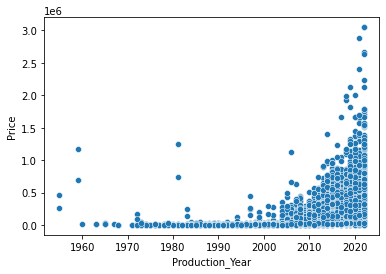

In [28]:
sns.scatterplot(data=turboaz,y='Price',x='Production_Year')

<AxesSubplot:xlabel='Production_Year', ylabel='Price'>

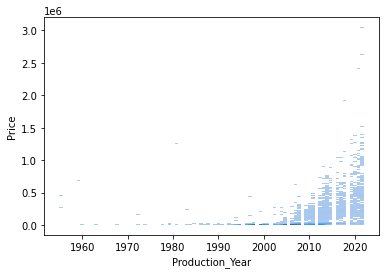

In [29]:
sns.histplot(data=turboaz,y='Price',x='Production_Year')

In [31]:
turboaz['km']=turboaz.KM_Driven.str.split(expand=True)[0]

In [32]:
turboaz['Engine']=turboaz.Engine_Power.str.split(expand=True)[0]

In [33]:
turboaz

,Unnamed: 0,Price,Currency,Make_and_Model,Production_Year,Engine_Power,KM_Driven,City,Date,Date1,Time,Date2,Engine,km
0,0,1712180.50,USD,Mercedes GLS 580,2022,4.0 L,0 km,Bakı,25.08.2022 11:26,25.08.2022,11:26,25.08.2022,4.0,0
1,1,697400.35,USD,Mercedes E 300,2022,2.0 L,0 km,Bakı,25.08.2022 11:27,25.08.2022,11:27,25.08.2022,2.0,0
2,2,37200.00,AZN,KAIYI X3 Pro,2022,1.5 L,0 km,Bakı,08.08.2022 14:01,08.08.2022,14:01,08.08.2022,1.5,0
3,3,341600.89,USD,Subaru Forester,2022,2.5 L,0 km,Bakı,26.08.2022 09:15,26.08.2022,09:15,26.08.2022,2.5,0
4,4,14400.00,AZN,Nissan Tiida,2012,1.5 L,39 000 km,Bakı,27.08.2022 10:22,27.08.2022,10:22,27.08.2022,1.5,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,25512,152303.00,USD,Jeep Grand Cherokee,2014,3.6 L,102 000 km,Bakı,27.08.2022 19:01,27.08.2022,19:01,27.08.2022,3.6,102
17494,25515,314432.00,USD,Lexus RX 300,2020,2.0 L,39 000 km,Bakı,27.08.2022 19:56,27.08.2022,19:56,27.08.2022,2.0,39
17495,25517,117912.00,USD,BMW 528,2013,2.0 L,185 000 km,Bakı,27.08.2022 19:03,27.08.2022,19:03,27.08.2022,2.0,185
17496,25518,162129.00,USD,Toyota Land Cruiser,2011,4.0 L,147 629 km,Bakı,27.08.2022 19:36,27.08.2022,19:36,27.08.2022,4.0,147


In [34]:
turboaz.isna().sum()

Unnamed: 0         0
Price              0
Currency           0
Make_and_Model     0
Production_Year    0
Engine_Power       0
KM_Driven          0
City               0
Date               0
Date1              0
Time               0
Date2              0
Engine             0
km                 0
dtype: int64

In [35]:
turboaz.duplicated().sum()

0

In [36]:
turboaz=turboaz.drop_duplicates()

In [37]:
turboaz.duplicated().sum()

0

In [38]:
turboaz['Price'].max()

3048516.5

In [39]:
turboaz['Price'].min()

700.0

In [40]:
turboaz['Currency'].value_counts()

AZN    13084
USD     4396
EUR       18
Name: Currency, dtype: int64

In [41]:
turboaz['Make_and_Model'].value_counts()

Opel Astra         674
LADA (VAZ) 2107    600
Chevrolet Cruze    446
LADA (VAZ) 2106    388
Toyota Prado       353
                  ... 
GAZ 330232-744       1
Nissan NV200         1
Peugeot 206          1
Isuzu NPR 71         1
Hyundai HD-120       1
Name: Make_and_Model, Length: 945, dtype: int64

In [42]:
turboaz['Production_Year'].min()

1955

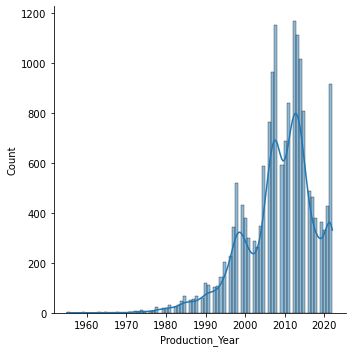

In [43]:
sns.displot(turboaz['Production_Year'],kde=True)

In [44]:
turboaz['City'].value_counts()

Bakı        12996
Sumqayıt     1515
Gəncə         513
Lənkəran      194
Xırdalan      127
            ...  
Liman           2
Yardımlı        2
Göytəpə         1
Xızı            1
Horadiz         1
Name: City, Length: 62, dtype: int64

In [45]:
turboaz['City'].unique()

array(['Bakı', 'Göyçay', 'Şirvan', 'Şəki', 'Sumqayıt', 'Gəncə', 'Salyan',
       'Ucar', 'Qusar', 'Masallı', 'İsmayıllı', 'Qazax', 'İmişli',
       'Şəmkir', 'Xırdalan', 'Goranboy', 'Quba', 'Mingəçevir', 'Yevlax',
       'Naxçıvan', 'Balakən', 'Xaçmaz', 'Bərdə', 'Zaqatala', 'Biləsuvar',
       'Lənkəran', 'Astara', 'Samux', 'Naftalan', 'Beyləqan', 'Sabirabad',
       'Qəbələ', 'Şamaxı', 'Ağcabədi', 'Saatlı', 'Qax', 'Ağstafa',
       'Zərdab', 'Tərtər', 'Göygöl', 'Cəlilabad', 'Füzuli', 'Kürdəmir',
       'Ağsu', 'Tovuz', 'Hacıqabul', 'Ağdaş', 'Neftçala', 'Şabran',
       'Xudat', 'Siyəzən', 'Ağdam', 'Oğuz', 'Gədəbəy', 'Lerik',
       'Cəbrayıl', 'Liman', 'Qobustan', 'Göytəpə', 'Yardımlı', 'Xızı',
       'Horadiz'], dtype=object)

C:\Users\Ismat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ismat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ismat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

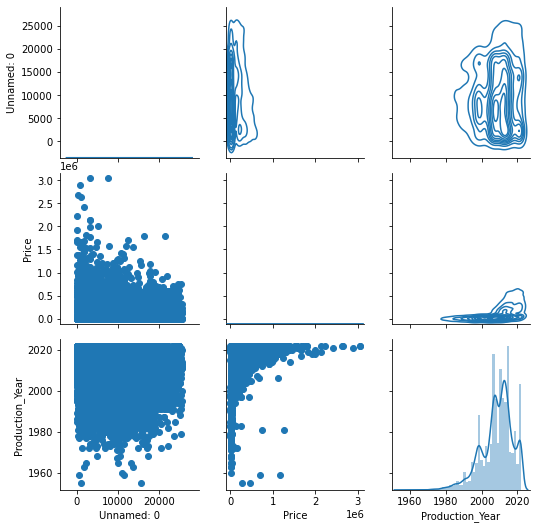

In [46]:
g=sns.PairGrid(turboaz)
g.map_diag(sns.distplot)
g.map_lower(plt.scatter)
g.map_upper(sns.kdeplot)

<AxesSubplot:>

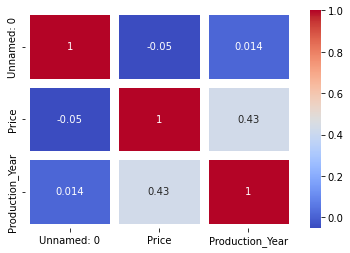

In [47]:
sns.heatmap(turboaz.corr(),annot=True,cmap='coolwarm',linecolor='white',linewidth=9)

In [48]:
turboaz

,Unnamed: 0,Price,Currency,Make_and_Model,Production_Year,Engine_Power,KM_Driven,City,Date,Date1,Time,Date2,Engine,km
0,0,1712180.50,USD,Mercedes GLS 580,2022,4.0 L,0 km,Bakı,25.08.2022 11:26,25.08.2022,11:26,25.08.2022,4.0,0
1,1,697400.35,USD,Mercedes E 300,2022,2.0 L,0 km,Bakı,25.08.2022 11:27,25.08.2022,11:27,25.08.2022,2.0,0
2,2,37200.00,AZN,KAIYI X3 Pro,2022,1.5 L,0 km,Bakı,08.08.2022 14:01,08.08.2022,14:01,08.08.2022,1.5,0
3,3,341600.89,USD,Subaru Forester,2022,2.5 L,0 km,Bakı,26.08.2022 09:15,26.08.2022,09:15,26.08.2022,2.5,0
4,4,14400.00,AZN,Nissan Tiida,2012,1.5 L,39 000 km,Bakı,27.08.2022 10:22,27.08.2022,10:22,27.08.2022,1.5,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,25512,152303.00,USD,Jeep Grand Cherokee,2014,3.6 L,102 000 km,Bakı,27.08.2022 19:01,27.08.2022,19:01,27.08.2022,3.6,102
17494,25515,314432.00,USD,Lexus RX 300,2020,2.0 L,39 000 km,Bakı,27.08.2022 19:56,27.08.2022,19:56,27.08.2022,2.0,39
17495,25517,117912.00,USD,BMW 528,2013,2.0 L,185 000 km,Bakı,27.08.2022 19:03,27.08.2022,19:03,27.08.2022,2.0,185
17496,25518,162129.00,USD,Toyota Land Cruiser,2011,4.0 L,147 629 km,Bakı,27.08.2022 19:36,27.08.2022,19:36,27.08.2022,4.0,147


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
turboaz['Currency_Encode'] = le.fit_transform(turboaz['Currency'])
turboaz['Make_and_Model_Encode'] = le.fit_transform(turboaz['Make_and_Model'])
turboaz['Production_Year_Encode'] = le.fit_transform(turboaz['Production_Year'])
turboaz['Engine_Encode'] = le.fit_transform(turboaz['Engine'])
turboaz['km_Encode'] = le.fit_transform(turboaz['km'])
turboaz['City_Encode'] = le.fit_transform(turboaz['City'])

In [50]:
turboaz

,Unnamed: 0,Price,Currency,Make_and_Model,Production_Year,Engine_Power,KM_Driven,City,Date,Date1,Time,Date2,Engine,km,Currency_Encode,Make_and_Model_Encode,Production_Year_Encode,Engine_Encode,km_Encode,City_Encode
0,0,1712180.50,USD,Mercedes GLS 580,2022,4.0 L,0 km,Bakı,25.08.2022 11:26,25.08.2022,11:26,25.08.2022,4.0,0,2,647,58,45,0,6
1,1,697400.35,USD,Mercedes E 300,2022,2.0 L,0 km,Bakı,25.08.2022 11:27,25.08.2022,11:27,25.08.2022,2.0,0,2,601,58,26,0,6
2,2,37200.00,AZN,KAIYI X3 Pro,2022,1.5 L,0 km,Bakı,08.08.2022 14:01,08.08.2022,14:01,08.08.2022,1.5,0,0,375,58,14,0,6
3,3,341600.89,USD,Subaru Forester,2022,2.5 L,0 km,Bakı,26.08.2022 09:15,26.08.2022,09:15,26.08.2022,2.5,0,2,843,58,31,0,6
4,4,14400.00,AZN,Nissan Tiida,2012,1.5 L,39 000 km,Bakı,27.08.2022 10:22,27.08.2022,10:22,27.08.2022,1.5,39,0,747,48,14,322,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,25512,152303.00,USD,Jeep Grand Cherokee,2014,3.6 L,102 000 km,Bakı,27.08.2022 19:01,27.08.2022,19:01,27.08.2022,3.6,102,2,370,50,41,5,6
17494,25515,314432.00,USD,Lexus RX 300,2020,2.0 L,39 000 km,Bakı,27.08.2022 19:56,27.08.2022,19:56,27.08.2022,2.0,39,2,491,56,26,322,6
17495,25517,117912.00,USD,BMW 528,2013,2.0 L,185 000 km,Bakı,27.08.2022 19:03,27.08.2022,19:03,27.08.2022,2.0,185,2,39,49,26,96,6
17496,25518,162129.00,USD,Toyota Land Cruiser,2011,4.0 L,147 629 km,Bakı,27.08.2022 19:36,27.08.2022,19:36,27.08.2022,4.0,147,2,870,47,45,54,6


In [53]:
features=['Make_and_Model_Encode','Production_Year_Encode','Engine_Encode','km_Encode','City_Encode']
target=['Price']
features_2=['Make_and_Model','Production_Year','Engine','km','City']

In [54]:
x=turboaz[features]
y=turboaz[target]
x_2=turboaz[features_2]

In [55]:
x_2

,Make_and_Model,Production_Year,Engine,km,City
0,Mercedes GLS 580,2022,4.0,0,Bakı
1,Mercedes E 300,2022,2.0,0,Bakı
2,KAIYI X3 Pro,2022,1.5,0,Bakı
3,Subaru Forester,2022,2.5,0,Bakı
4,Nissan Tiida,2012,1.5,39,Bakı
...,...,...,...,...,...
17493,Jeep Grand Cherokee,2014,3.6,102,Bakı
17494,Lexus RX 300,2020,2.0,39,Bakı
17495,BMW 528,2013,2.0,185,Bakı
17496,Toyota Land Cruiser,2011,4.0,147,Bakı


In [56]:
y

,Price
0,1712180.50
1,697400.35
2,37200.00
3,341600.89
4,14400.00
...,...
17493,152303.00
17494,314432.00
17495,117912.00
17496,162129.00


In [57]:
x_3=pd.get_dummies(x_2)
x_3.shape

(17498, 1696)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(x_3,y, test_size = 0.3, random_state = 0)

In [59]:
#  RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
turbo_model = RandomForestRegressor()
    #n_estimators=400,
    #criterion='poisson',
    #max_depth=None,
    #min_samples_split=2,
    #min_samples_leaf=2,
    #min_weight_fraction_leaf=0.0,
    #max_features=1.0,
    #max_leaf_nodes=None,
    #min_impurity_decrease=0.8,
    #bootstrap=True,
    #oob_score=True,
    #n_jobs=4,
    #random_state=1,
    #verbose=0,
    #warm_start=True,
    #ccp_alpha=0.9,
    #max_samples=None)
turbo_model.fit(X_train,Y_train)
prediction = turbo_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
#from ml_metrics import rmse_score 
score1 = r2_score(Y_test, prediction)
score2 = np.sqrt(mean_squared_error(Y_test, prediction))
print(score1,score2)

C:\Users\Ismat\AppData\Local\Temp/ipykernel_14372/505371888.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  turbo_model.fit(X_train,Y_train)


0.7956188257158364 84462.1720625447


In [60]:
# XGB
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
                           #n_estimators=90,
                           #max_depth=90,
                           #n_jobs =99,
                           #max_leaves=0,
                           #max_bin=99,
                           #grow_policy='depthwise',
                           #learning_rate=0,
                           #verbosity=0,
                           #booster='dart',
                           #gamma=1,
                           #min_child_weight= 1,
                           #max_delta_step=1 ,
                           #subsample=1 ,
                           #sampling_method=1 ,
                           #colsample_bytree= 1,
                           #colsample_bylevel=1 ,
                           #colsample_bynode=1 ,
                           #reg_alpha= 1,
                           #reg_lambda= 1,
                           #scale_pos_weight=1 ,
                           #base_score= 1,
                           #random_state= 1,
                           #missing= 1,
                           #num_parallel_tree= 1,
                           #monotone_constraints=1 ,
                           #interaction_constraints= 1,
                           #gpu_id=1,
                           #validate_parameters=1 ,
                           #predictor= 1,
                           #enable_categorical= 1,
                           #max_cat_to_onehot=1 ,
                           #eval_metric= '',
                           #early_stopping_rounds=1 ,
                           #callbacks=None,
                           #kwargs=1 ,
                           #hess=0 )
xgb_model.fit(X_train,Y_train)
Y_pred = xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
score5 = r2_score(Y_test, prediction)
score6 = np.sqrt(mean_squared_error(Y_test, prediction))
print(score5,score6)

0.7956188257158364 84462.1720625447


In [61]:
# DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
    #criterion='poisson',
    #splitter='best',
    #max_depth=None,
    #min_samples_split=2,
    #min_samples_leaf=2,
    #min_weight_fraction_leaf=0.0,
    #max_features=0.8,
    #random_state=0,
    #max_leaf_nodes=None,
    #min_impurity_decrease=0.0,
    #ccp_alpha=0.88)
dec_model.fit(X_train,Y_train)
prediction = dec_model.predict(X_test)
prediction

from sklearn.metrics import r2_score, mean_squared_error
#from ml_metrics import rmse_score 
score3 = r2_score(Y_test, prediction)
score4 = np.sqrt(mean_squared_error(Y_test, prediction))
print(score1,score2)


0.7956188257158364 84462.1720625447


In [62]:
def price_prediction(make_model, engine, year, km):

    encodevalue = turboaz[turboaz['Make_and_Model'] == make_model]['Make_Model_Encode'].values[0]

    testdata = pd.DataFrame()

    testdata = testdata.append({
        'Make_Model_Encode':encodevalue,
        'Engine':engine,
        'Production_Year':year,
        'km':km
    },ignore_index=True)

    X_train = turboaz.loc[:,['Make_Model_Encode','Production_Year','Engine_Power','KM_Driven']].values
    Y_train = turboaz['Converted_Price'].values

    regressor.fit(X_train,Y_train)

    return turbo_model.predict(test.values)[0]

In [ ]:
price_prediction('Chevrolet Malibu', 1500, 2016, 61000)

In [ ]:
def price (model,engine,year,km,city):
   
    test_data = pd.DataFrame()
    
     
    
    Make_and_Model_encoded = turboaz[turboaz['Make_and_Model'] == model]['Make_and_Model_Encode'].values[0]
    
    Engine_encoded = turboaz[turboaz['Engine'] == engine]['Engine_Encode'].values[0]
    
    Production_Year_Encoded=turboaz[turboaz['Production_Year'] == year]['Production_Year_Encode'].values[0]
    
    km_encoded = turboaz[turboaz['km'] == km]['km_Encode'].values[0]
    
    city_encoded = turboaz[turboaz['City'] == city]['City_Encode'].values[0]
    
    test_data = test_data.append({'Make_and_Model_Encode':Make_and_Model_encoded,
                                  'Production_Year_Encode':Production_Year_Encoded,'Engine_Encode':Engine_encoded,'km_Encode':km_encoded,
                                  'City_Encode':city_encoded},ignore_index = True)
    
    X_test = test_data.loc[:,['Make_and_Model_Encode','Production_Year_Encode','Engine_Encode','km_Encode','City_Encode']].values
    
    prediction = turbo_model.predict(X_test)
    
    return f'Price : {round(prediction[0])}';











In [ ]:
price('Mercedes GLS 580','4.0',2022,'0','Bakı')